# Logistic Regression

## 1. Logistic Function

### Sigmoid Functions

* A sigmoid function is a mathematical function that produces an S-shaped curve.
* A common example of a sigmoid function is the logistic function.
* It is defined by the following formula:
---


>$$\rho(x) = \frac{1}{1+e^{-x}} = \frac{e^{x}}{1+e^{x}} = 1 - \rho(-x)$$


---

### Logistic Function

* The logistic function $\rho(t)$ is a sigmoid function with values between 0 and 1.

The logistic function is defined as:

---


>$$\rho(t) = \frac{1}{1+e^{-t}}$$


>$$
\rho(t) = 
\begin{cases}
< 0.5 & \text{si } t < 0 \\
\geq 0.5 & \text{si } t \geq 0
\end{cases}
$$


---

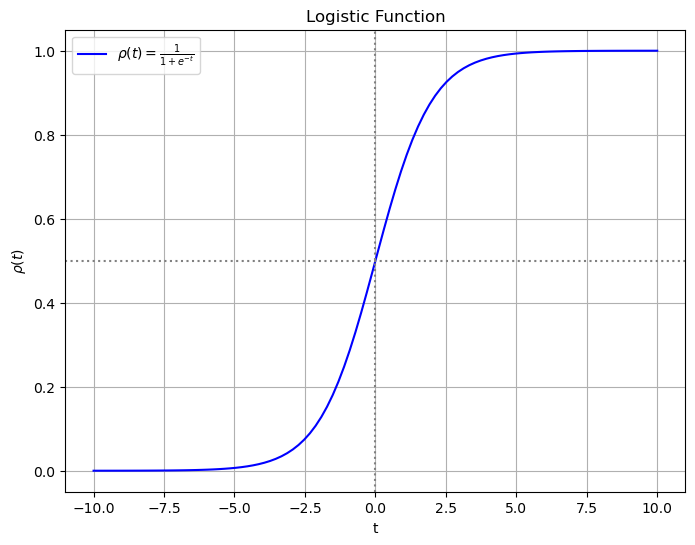

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic function
def logistic_function(t):
    return 1 / (1 + np.exp(-t))

# Generate a range of values for t
t = np.linspace(-10, 10, 100)

# Calculate logistic function values
rho_t = logistic_function(t)

# Plot logistic function
plt.figure(figsize=(8, 6))
plt.plot(t, rho_t, label=r'$\rho(t) = \frac{1}{1+e^{-t}}$', color='blue')
plt.axhline(0.5, color='gray', linestyle=':')
plt.axvline(0, color='gray', linestyle=':')
plt.xlabel('t')
plt.ylabel(r'$\rho(t)$')
plt.title('Logistic Function')
plt.legend()
plt.grid(True)
plt.show()


* The linear regression equation is:
---


>$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n$$


---

* Applying the sigmoid function, we get:
---


>$$\hat{p}(x) = \frac{1}{1 + e^{-(\theta_0 + \theta_1 x_1 + \ldots + \theta_n x_n)}}$$

Where:
- $\theta_0$ is the bias
- $\theta_1, \ldots, \theta_n$ are the weights of the variables $x$

* In the case of a single feature $x$, the logistic curve equation is:
---


>$$\hat{p}(x) = \frac{1}{1 + e^{-(\theta_0 + \theta_1 x)}}$$

Where:
- $\theta_0$ is the bias
- $\theta_1$ is the weight of the variable $x$


---

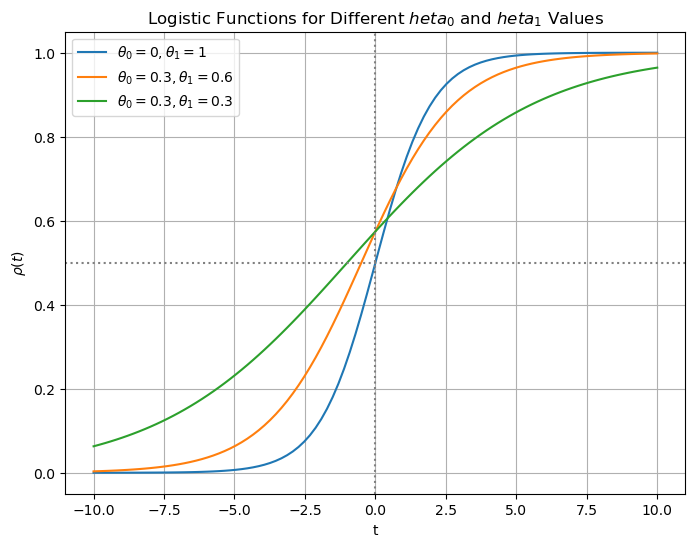

In [17]:
# Different values of theta_0 and theta_1
theta_values = [(0, 1), (0.3, 0.6), (0.3, 0.3)]

# Plot logistic functions for different theta values
plt.figure(figsize=(8, 6))
for theta_0, theta_1 in theta_values:
    plt.plot(t, logistic_function(theta_0 + theta_1 * t), label=r'$\theta_0={}, \theta_1={}$'.format(theta_0, theta_1))
plt.axhline(0.5, color='gray', linestyle=':')
plt.axvline(0, color='gray', linestyle=':')
plt.xlabel('t')
plt.ylabel(r'$\rho(t)$')
plt.title('Logistic Functions for Different $\theta_0$ and $\theta_1$ Values')
plt.legend()
plt.grid(True)
plt.show()

* The logistic regression model estimates the probability that an observation $x$ belongs to the positive class via the probability:
---


>$$\hat{p} = h_\theta(x) = \rho(x^T \theta)$$


---
* Once the probability is estimated, we can make a prediction based on the logistic regression model:
---


>$$\hat{y} = \begin{cases} 
0 & \text{if } \hat{p} < 0.5 \\
1 & \text{if } \hat{p} \geq 0.5
\end{cases}
$$


---
(Implement a graph of a logistic function with the two sections colored, where \(\hat{y} = 0\) (blue) and \(\hat{y} = 1\) (green))


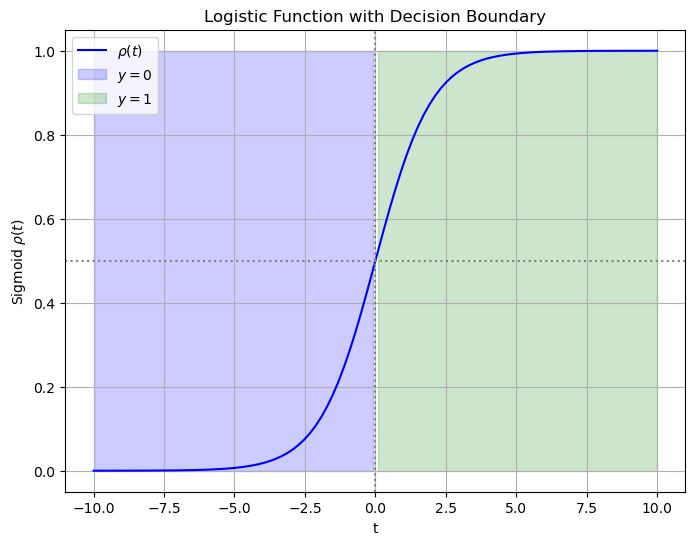

In [25]:
# Plot logistic function with colored sections
plt.figure(figsize=(8, 6))
plt.plot(t, rho_t, label=r'$\rho(t)$', color='blue')
plt.fill_between(t, 0, 1, where=(t < 0), color='blue', alpha=0.2, label=r'$y=0$')
plt.fill_between(t, 0, 1, where=(t >= 0), color='green', alpha=0.2, label=r'$y=1$')
plt.axhline(0.5, color='gray', linestyle=':')
plt.axvline(0, color='gray', linestyle=':')
plt.xlabel('t')
plt.ylabel(r'Sigmoid $\rho(t)$')
plt.title('Logistic Function with Decision Boundary')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

* The probability that an observation $x$ belongs to the positive class follows a Bernoulli distribution.
* In mathematics and probability theory, the Bernoulli distribution, named after the Swiss mathematician Jacob Bernoulli, is the probability distribution of a random variable which takes the value 1 with probability $p$ and the value 0 with probability $q = 1 - p$.
---


>$$P(Y = y) = p^y (1-p)^{1-y}, \, y \in \{0, 1\}$$


---

* The probability that an observation \(x\) belongs to the positive class follows a Bernoulli distribution:
---


>$$P(Y = y) = \rho(t)^y (1-\rho(t))^{1-y}$$


---

* The goal is to determine the best possible model, i.e., the model that makes the smallest errors between the real values and the predicted values.
* The logistic regression model estimates the probability that an observation $x$ belongs to the positive class via the probability:
---


>$$\hat{p} = h_\theta(x) = \rho(x^T \theta)$$


---

## 2. The Cost Function

### Log Loss Function

The cost function measured over the entire training dataset that we will use for logistic regression is the log loss function:

---


>$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)}) \right]
$$

Where:
- $y^{(i)}$ is the class label of observation $i$
- $m$ is the number of observations
- $\hat{p}^{(i)}$ is the predicted probability that observation $ x^{(i)}$ belongs to the positive class

#### Origin of the Log Loss Function

* In statistics, likelihood is a parameter that evaluates the performance of a model by its plausibility with respect to real data.
---


>$$L = \prod_{i=1}^{m} P(Y = y_i)$$


---

* For $m$ observations, using the Bernoulli distribution, we get:
---


> $$L = \prod_{i=1}^{m} P(Y = y_i) = \prod_{i=1}^{m} a_i^{y_i} \times (1 - a_i)^{1 - y_i}$$


---

* Since likelihood is a product of probabilities (i.e., products of numbers between 0 and 1), the result may approach zero.

* To avoid converging to zero, we use a logarithmic function to transform the product into sums:
---


>$$\log(L) = \log \left( \prod_{i=1}^{m} a_i^{y_i} \times (1 - a_i)^{1 - y_i} \right)$$


---

* Using a logarithmic function for transformation is not a problem because it is a monotonically increasing function:
---


>$$a < b \implies \log(a) < \log(b)$$


---


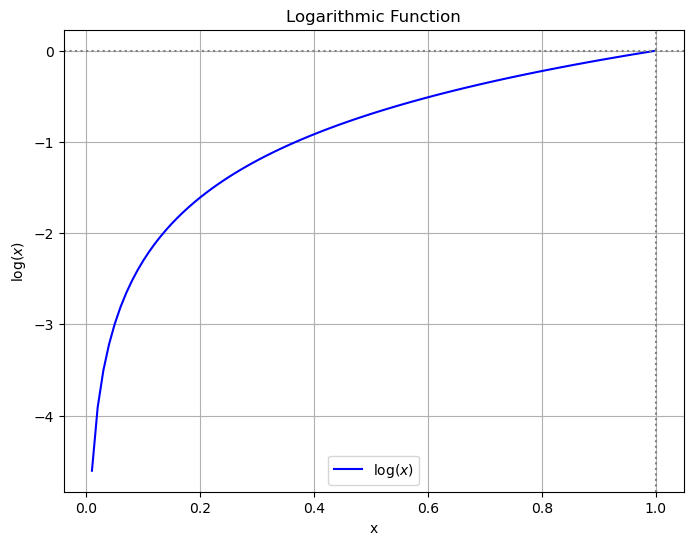

In [27]:

# Plot the log function
x = np.linspace(0.01, 1, 100)  # Avoid log(0) by starting from 0.01
log_values = np.log(x)

plt.figure(figsize=(8, 6))
plt.plot(x, log_values, label=r'$\log(x)$', color='blue')
plt.axhline(0, color='gray', linestyle=':')
plt.axvline(1, color='gray', linestyle=':')
plt.xlabel('x')
plt.ylabel(r'$\log(x)$')
plt.title('Logarithmic Function')
plt.legend()
plt.grid(True)
plt.show()


* Determining the maximum likelihood is equivalent to determining the maximum log-likelihood (LL). Thus, we get:
---


>$$
\begin{aligned}
LL = \log(L) &= \log \left( \prod_{i=1}^{m} a_i^{y_i} \times (1 - a_i)^{1 - y_i} \right) \\
&= \sum_{i=1}^{m} \log \left( a_i^{y_i} \times (1 - a_i)^{1 - y_i} \right) \\
&= \sum_{i=1}^{m} \left( y_i \log(a_i) + (1 - y_i) \log(1 - a_i) \right)
\end{aligned}
$$


---
* We aim to maximize the likelihood or minimize its negative function (the cost function). 
* We can also multiply by a normalization factor (1/m):

Thus, we obtain the log loss function:

---


>$$L = -\frac{1}{m} \sum_{i=1}^{m} \left( y_i \log(a_i) + (1 - y_i) \log(1 - a_i) \right)$$


---

How do we minimize this cost function?

## 3. Training the Logistic Regression Model

### Training

The cost function is given by:

---


>$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)}) \right]
$$


---
* The objective of training is to determine the value of $\theta$ that minimizes this function $J(\theta)$. But how do we determine the value of $\theta$?

* The log loss cost function is convex, ensuring the identification of a global minimum if we use the gradient descent algorithm.

* Conditions:
  - Choose a learning rate that is not too large.
  - Choose a sufficiently large number of iterations.

* The partial derivative of the cost function with respect to the $j$-th parameter of the model $\theta_j$ can be calculated as:
---


>$$
\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( \underbrace{\sigma(\theta^T x^{(i)}) - y^{(i)}}_{\text{Prediction error}} \right) \underbrace{x^{(i)}_j}_{\text{Value of the j-th variable}}
$$


---

* Then, we proceed with either ordinary gradient descent, stochastic gradient descent, or mini-batch gradient descent.